In [2]:
# reset x, y min and max
xmin = -200
xmax = 200
ymin = -200
ymax = 200

In [3]:

# december step 1

dcmap1 = {}
ind= 0

for ix in range(int(xmin), int(xmax)):
    for iy in range(int(ymin), int(ymax)):
        myvec=[]
        myvec.append(ix)
        myvec.append(iy)
        dcmap1[ind]=myvec
        ind=ind+1


In [4]:
# initialize 

# combine steps 

# december step 2 
dlookupdict={}
dinvlookupdict={}

for i in range(160000):
    dlookupdict[i] = dcmap1[i]
    p1 = dcmap1[i][0]
    p2 = dcmap1[i][1]
    dinvlookupdict[(p1,p2)]=i

# december step 3

dtrajcount={}
# xmin, xmax, ymin, ymax

# change range to -10, 10
range1 = 10 

for i in range(160000):
    p = dlookupdict[i]
    px = p[0]
    py = p[1]
    if i==100000:
        print(100000)
    # calculate x between i.x - 5, i.x+5
    for j in range(-range1, range1+ 1):
        jx = px+j
        if jx>xmax-1 or jx<xmin: # check if pts in range
            continue
        # calculate y between i.y-5, i.y+5 
        for k in range(-range1, range1+1):
            jy = py+k
            # check if pts are in range
            if jy>ymax-1 or jy<ymin:
                continue
            # inv dict lookup
            p2 = dinvlookupdict[(jx, jy)]
            # save trajcount1[(i, p2)]
            dtrajcount[(i, p2)]=0


100000


MemoryError: 

In [4]:
dcmap1[3]

[-200, -197]

In [25]:
# updated version of training based on altertrajcount

# train with trajectory

# dec step 3.b
#listoutliers = []
#rangeoutliers = {}
#doutlier = {}
#listoutliers2 = {}

# step 4 

#tfile = "dec2019/Ramp/2019-9-9-15-0-0-BF1-CL1-Traj(0-18000frames)Ramp.csv"
tfile =  "2019-9-10-12-0-0-BF1-CL1-Traj(0-18000frames).csv"

import math
import csv

trajnum = 0 
obnum = 1

irow =0

outlier =0

with open(tfile) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        irow=irow+1
        trajnum = row[0]
        frameindex = row[17]
        #print("frame:",frameindex)
        if line_count==0:
            line_count=line_count+1
            continue
        if line_count==1:
            line_count=line_count+1
            prevrow = row
            prevx = float(prevrow[6])
            prevy = float(prevrow[7])
            print(prevx)
            print(prevy)
            # use round instead of floor
            pfx = round(prevx)
            pfy = round(prevy)
            continue
        currentx = float(row[6])
        currenty = float(row[7])
        fx = round(currentx)
        fy = round(currenty)
        if pfx ==fx and pfy==fy:
            #i = dinvlookupdict[(pfx, pfy)]
            #altertrajcount[i] = altertrajcount[i]+1 # altertraj holds counts of one cell to same cell 
            prevframe= frameindex
            line_count = line_count+1
        if obnum != trajnum:
            pfx = fx
            pfy = fy
            obnum = trajnum
            prevframe = frameindex
            line_count = line_count+1
            continue
        # save to map
        fromi = dinvlookupdict[(pfx,pfy)]
        toi = dinvlookupdict[(fx,fy)]
        # check if it is in range : exclude outliers dictionary
        if abs(pfx - fx)>10 or abs(pfy - fy)>10:
            line_count= line_count+1
            continue
        mcount = dtrajcount[(fromi, toi)]
        if mcount>5000:
            print("fromi:", fromi, " toi:", toi)
        dtrajcount[(fromi, toi)]= mcount+1
        pfx = fx
        pfy = fy
        prevframe= frameindex
        line_count = line_count+1



56.0933
27.3101


In [4]:
import csv

# train with multiple trajectory files 
fileind = 1
import os
for filename in os.listdir('24hrdata'):
    #entries = os.listdir()
    print(filename)
    fileind = fileind+1
    #if fileind > 3:
    #    break
    fname = '24hrdata/'+filename
    irow=0
    obnum=1
    with open(fname) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            irow=irow+1
            trajnum = row[0]
            frameindex = row[17]
            #print("frame:",frameindex)
            if line_count==0:
                line_count=line_count+1
                continue
            if line_count==1:
                line_count=line_count+1
                prevrow = row
                prevx = float(prevrow[6])
                prevy = float(prevrow[7])
                print(prevx)
                print(prevy)
                # use round instead of floor
                pfx = round(prevx)
                pfy = round(prevy)
                continue
            currentx = float(row[6])
            currenty = float(row[7])
            fx = round(currentx)
            fy = round(currenty)
            if pfx ==fx and pfy==fy:
                #i = dinvlookupdict[(pfx, pfy)]
                #altertrajcount[i] = altertrajcount[i]+1 # altertraj holds counts of one cell to same cell 
                prevframe= frameindex
                line_count = line_count+1
            if obnum != trajnum:
                pfx = fx
                pfy = fy
                obnum = trajnum
                prevframe = frameindex
                line_count = line_count+1
                continue
            # save to map
            fromi = dinvlookupdict[(pfx,pfy)]
            toi = dinvlookupdict[(fx,fy)]
            # check if it is in range : exclude outliers dictionary
            if abs(pfx - fx)>10 or abs(pfy - fy)>10:
                line_count= line_count+1
                continue
            mcount = dtrajcount[(fromi, toi)]
            if mcount>5000:
                print("fromi:", fromi, " toi:", toi)
            dtrajcount[(fromi, toi)]= mcount+1
            pfx = fx
            pfy = fy
            prevframe= frameindex
            line_count = line_count+1


2019-8-27-0-0-0-BF1-CL1-Traj(0-18000frames).csv
-6.16064
7.21828
2019-8-27-0-30-0-BF1-CL1-Traj(0-18000frames).csv
94.8488
24.8301
2019-8-27-1-0-0-BF1-CL1-Traj(0-18000frames).csv
-79.207
15.7409
2019-8-27-1-30-0-BF1-CL1-Traj(0-18000frames).csv
-68.1242
13.8972
2019-8-27-10-0-0-BF1-CL1-Traj(0-18000frames).csv
-36.0177
8.06411
2019-8-27-10-30-0-BF1-CL1-Traj(0-18000frames).csv
-20.8098
9.06996
2019-8-27-11-0-0-BF1-CL1-Traj(0-18000frames).csv
12.7673
8.01511
2019-8-27-11-30-0-BF1-CL1-Traj(0-18000frames).csv
33.3678
28.9857
2019-8-27-12-0-0-BF1-CL1-Traj(0-18000frames).csv
33.3341
28.2393
2019-8-27-12-30-0-BF1-CL1-Traj(0-18000frames).csv
-32.6858
12.0325
2019-8-27-13-0-0-BF1-CL1-Traj(0-18000frames).csv
-7.91949
12.3122
2019-8-27-13-30-0-BF1-CL1-Traj(0-18000frames).csv
-24.7955
8.72216
2019-8-27-14-0-0-BF1-CL1-Traj(0-18000frames).csv
-33.5303
15.3514
2019-8-27-14-30-0-BF1-CL1-Traj(0-18000frames).csv
-21.0828
8.26651
2019-8-27-15-0-0-BF1-CL1-Traj(0-18000frames).csv
17.1306
8.11225
2019-8-27-15-

In [ ]:
# code to find the initial general direction

# from the training

# divide the space into cells: tree?


In [1]:
dtrajcount[(1,1)]

NameError: name 'dtrajcount' is not defined

In [9]:
# load errorclusters
#THIS ONE 
# error clusters 


# pre processing step: load lidar_similarlabeledclusters.csv
import csv
# dictionary mapping framenumber to array of clusterids
errorclusters = {}

firstrow =0


#lidarsim = 'lidar_similarlabeledclusters.csv'
#lidarsim = 'lidar_similarlabeledclusters_v2.csv'


lidarsim='lidar_similar301-600.csv'
with open(lidarsim) as lidarsim_csv_file:
    sim_csv_reader = csv.reader(lidarsim_csv_file, delimiter=",")
    for row in sim_csv_reader:
        # skip header row
        if firstrow==0:
            firstrow=1
            continue
        framenumber = int(row[0])
        arr = []
        cluster1 = row[1]
        cluster2 = row[2]
        cluster3 = row[3]
        arr.append(int(cluster1))
        if len(cluster2) > 0:
            arr.append(int(cluster2))
        if len(cluster3) >0:
            arr.append(int(cluster3))
        #print(row)
        errorcode = int(row[4])
        if errorcode == 1:
            # add to dictionary
            #print("add")
            v = errorclusters.get(framenumber)
            if v==None:
                errorclusters[framenumber] = [arr]
            else:
            # append additional array
                a = errorclusters[framenumber]
                alen = len(a)
                em = []
                for i in range(0, alen):
                    em.append(a[i])
                em.append(arr)
                
                errorclusters[framenumber] = em
            

In [6]:
# december highest 
# step 4 b 

def dhighestfreq(fromi):
    highest = 0
    indexhighest = fromi
    (px, py) = dlookupdict[fromi]
    for j in range(-10, 11):
        jx = px+j
        if jx>xmax-1 or jx<xmin: # check if pts in range
            continue
        for k in range(-10, 11):
            jy = py+k
            # check if pts are in range
            if jy>ymax-1 or jy<ymin:
                continue
            toi = dinvlookupdict[(jx, jy)]
            t = dtrajcount[(fromi, toi)]
            #if t>0:
                #print(t)
            if t > highest:
                highest=t
                indexhighest=toi
    return highest, indexhighest

In [7]:

def unique(list1): 
      
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set)) 
    return unique_list

In [8]:
# rename

#datastorename = 'datastoreAug16.csv'


def findnextclusterapp(iframe, initialcluster): # frame and cluster
    datastorename='datastoreAug16.csv'
    #datastorename = 'newdatastoreMay17.csv'
    outputmatched =0
    rowid = 0
    #datastorename = 'datastoreAug16.csv'
    if iframe>550:
        datastorename='datastoreAug25.csv'
    #if iframe > 300:
    #    datastorename='datastoreAug16.csv'
    
    with open(datastorename) as datastore_csv_file:
        datastore_csv_reader = csv.reader(datastore_csv_file, delimiter=",")

        for row in datastore_csv_reader:
            rowid = rowid+1
            # 1 - frame 
            framenum = float(row[0])

            # 2 - cluster id
            clusterid = float(row[1])

            matched = float(row[18])  #return this matched

            if framenum < iframe:
                continue
                
            if framenum > iframe:
                break

            if clusterid == initialcluster:
                #print("row", rowid)
                #print("frame num", framenum)
                #print("init cluster", initialcluster)
                #print("matched is ", matched)
                outputmatched = matched
                return outputmatched
            
    return outputmatched

# find the next cluster from our algorithm

# iterate over all the clusters in frame len1+1 to see 
# iframe is frame number 

def findnextcluster(iframe, elementclusterarray):  # iframe is the current cluster, clusterarray holds ids of similar clusters 

    ky =0 # if no next cluster
    # sort by increasing order
    #sortedarray = np.sort(clusterarray)
    
    name = "file_out"
    name = name+str(iframe)
    name1 = name+".csv"
    name2 = "file_out"+str(iframe+1)+".csv"

# clear matchfreq
    for j in range(0, mx):
        matchfreq[j] =0

    with open(name1) as csv_file:
        f =0 
        # reset hxvalues , hyvalues
        hxvalues = []
        hyvalues=[]

        countmap= {}

        csv_reader = csv.reader(csv_file, delimiter=",")

        for row in csv_reader:
            cid= float(row[0]) 
            # determine which cluster id is the highest 
            xr = round(float(row[1]))
            yr = round(float(row[2]))
            fromi = dinvlookupdict[(xr,yr)]
            # function to find highest freq 
            h1, i1 = dhighestfreq(fromi)

            if cid ==  elementclusterarray:
                countmap[i1] = 1

    obnum = 1 

    f = 0                   
    with open(name2) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=",")
        for row in csv_reader:
            cid = float(row[0])
            xr =round(float(row[1]))
            yr = round(float(row[2]))
            fromi = dinvlookupdict[(xr,yr)]
            # next cluster 
            if cid != obnum:
                numo1 = float(obnum)
                if matchfreq[numo1] > f:
                    f = matchfreq[numo1]
                    ky = numo1
                obnum = cid

            val = countmap.get(fromi)
            if val != None:
                matchfreq[cid] =matchfreq[cid]+1


    #print(ky, "is the next cluster")     
    return ky

In [6]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# initialize 
#sfs =[390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]

sfs = [10, 20, 30, 40, 50, 60,70, 80,90,100]
for s in sfs:
    map10[s] = []
    

In [41]:
#sfs = [110, 120, 130, 140,150, 160,170,180,190,200]
#map10 = {}
sfs = [310, 320, 330, 340,350,360,370,380,390,400,410,420,430,440,450]
for s in sfs:
    map10[s] = []

In [11]:
map10

NameError: name 'map10' is not defined

In [68]:
map10

{390: [],
 400: [],
 410: [1.0, 2.0],
 420: [],
 430: [],
 440: [],
 450: [],
 460: [],
 470: [],
 480: [],
 490: [],
 500: [],
 10: [],
 20: [1.0, 3.0, 3.0],
 30: [2.0, 2.0, 2.0, 2.0],
 40: [8.0, 8.0, 8.0, 8.0],
 50: [6.0, 6.0],
 60: [1.0, 1.0, 1.0],
 70: [1.0, 1.0, 1.0],
 80: [4.0, 4.0, 4.0, 6.0, 4.0],
 90: [5.0, 5.0, 5.0, 1.0, 5.0, 2.0],
 100: [7.0, 7.0, 7.0, 7.0],
 110: [1.0, 1.0],
 120: [2.0, 2.0],
 130: [2.0, 2.0, 2.0, 2.0],
 140: [],
 150: [2.0],
 160: [],
 170: [],
 180: [],
 190: [],
 200: []}

In [56]:
map10[380]

[]

f is 99
f is 114
f is 95
f is 65
initial cluster 1
initial frame 380
final array is [1, 1.0, 1.0, 1.0, 1.0]
listclusterids is [1, 1.0, 1.0, 1.0, 1.0]
length of array  5


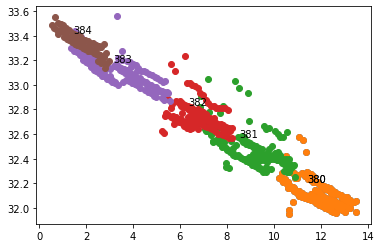

f is 52
f is 35
f is 29
f is 59
f is 22
initial cluster 2
initial frame 380
final array is [2, 2.0, 2.0, 2.0, 3.0, 1.0]
listclusterids is [2, 2.0, 2.0, 2.0, 3.0, 1.0]
length of array  6


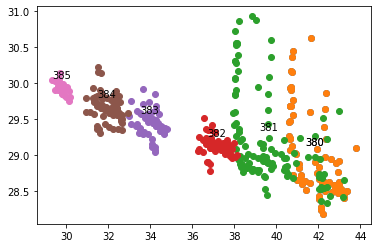

f is 3
f is 35
f is 29
f is 59
f is 22
initial cluster 3
initial frame 380
final array is [3, 2.0, 2.0, 2.0, 3.0, 1.0]
listclusterids is [3, 2.0, 2.0, 2.0, 3.0, 1.0]
length of array  6


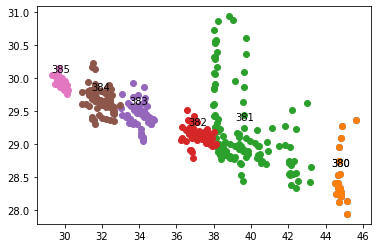

f is 2
f is 5
f is 10
f is 18
f is 8
initial cluster 4
initial frame 380
final array is [4, 3.0, 4.0, 4.0, 5.0]
listclusterids is [4, 3.0, 4.0, 4.0, 5.0]
length of array  5


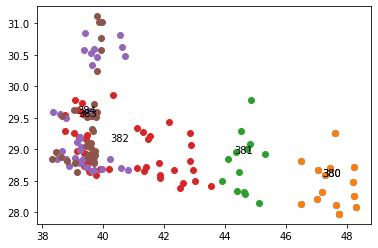

f is 14
f is 1
f is 18
f is 8
initial cluster 5
initial frame 380
final array is [5, 4.0, 4.0, 4.0, 5.0]
listclusterids is [5, 4.0, 4.0, 4.0, 5.0]
length of array  5


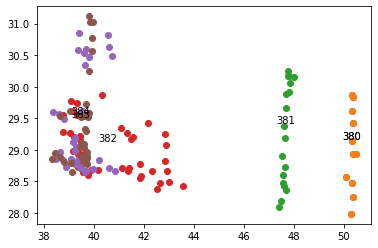

f is 18
f is 19
f is 24
f is 15
initial cluster 6
initial frame 380
final array is [6, 6.0, 6.0, 7.0, 8.0]
listclusterids is [6, 6.0, 6.0, 7.0, 8.0]
length of array  5


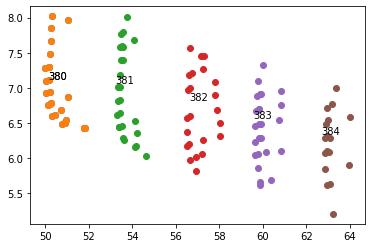

initial cluster 7
initial frame 380
final array is [7]
listclusterids is [7]
length of array  1


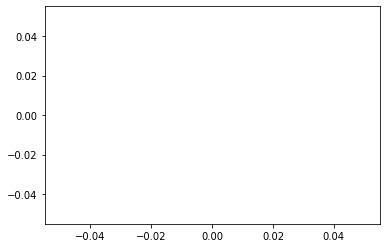

initial cluster 8
initial frame 380
final array is [8]
listclusterids is [8]
length of array  1


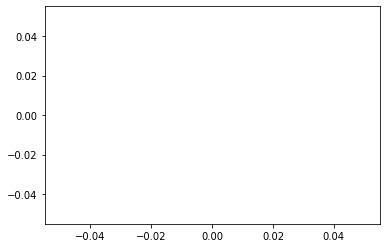

initial cluster 9
initial frame 380
final array is [9]
listclusterids is [9]
length of array  1


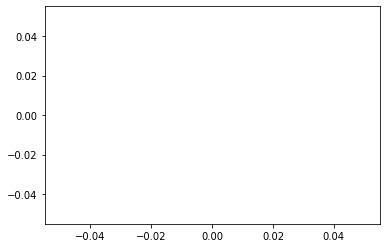

initial cluster 10
initial frame 380
final array is [10]
listclusterids is [10]
length of array  1


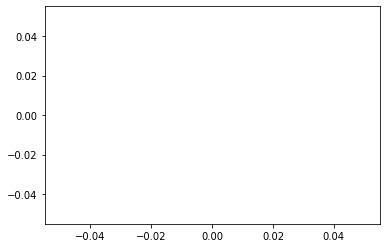

initial cluster 11
initial frame 380
final array is [11]
listclusterids is [11]
length of array  1


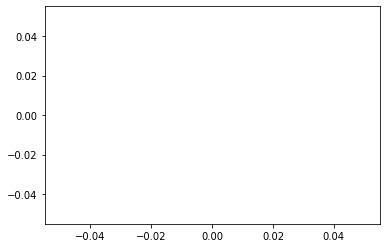

initial cluster 12
initial frame 380
final array is [12]
listclusterids is [12]
length of array  1


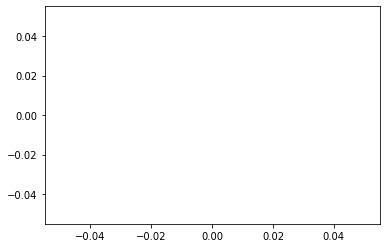

In [57]:
# version where finding max trajectories

# original frequency grid method

c1 = 1
c2 = 12 # 6

ca = list(range(c1, c2+1))




# new params
totresults = []
totclusterids=[]

#diff. category of accuracy index
missedmatching = 0
wrongmatching =0 # matched to a different cluster
continuedmatching = 0 # continues erroneously 

clustering_error = 0 

#####
initialframe = 380
endframe = 480

# unew = map10[initialframe]

unew = []
carray = np.setdiff1d(ca, unew)


for initialcluster in carray:#range(c1, c2+1):
    
    
    arrayx = []
    arrayy = []
    pavex = []
    pavey = []

    phx = [] # previous high x values
    phy =[] 


    obnum = 1

    totalmap ={}

    prevmap = {}

    mf = defaultdict(list)
    # maximum object/cluster id in any frame
    mx = 20

    for j in range(0, mx):
        mf[j]=0 

    matchfreq= mf


    thres= 10

    finalarray=[]

    finalarray.append(initialcluster)

    finalx =[]
    finaly =[]

    avex =[]
    avey =[]

    xvalues =[]
    yvalues =[]

    # edited method
    angles = []


    for i in range(initialframe, endframe+1):
        name = "file_out"
        name = name+str(i)
        name = name+".csv"
        firstrow=0
        # clear matchfreq
        for j in range(0, mx):
            matchfreq[j] =0

        currentmap3 = {} # average coordinates

        #print("curr frame is:", i)


        with open(name) as csv_file:
            f =0 
            # reset hxvalues , hyvalues
            hxvalues = []
            hyvalues=[]

            obnum=1 

            currentmap= {}

            csv_reader = csv.reader(csv_file, delimiter=",")

            if i==initialframe:
                for row in csv_reader:
                    # no need for first row skip 
                    clusterid = float(row[0])
                    if clusterid==initialcluster:
                        xpoint = float(row[1])
                        ypoint = float(row[2])
                        #print("xpt", xpoint)
                        #print("ypt", ypoint)
                        arrayx.append(xpoint)
                        arrayy.append(ypoint)
                        xr = round(xpoint)
                        yr = round(ypoint)
                        fromi = dinvlookupdict[(xr,yr)]
                        h1, i1 = dhighestfreq(fromi)
                        #i1 = newhighestfreq(fromi)
                        prevmap[i1] = 1

                plt.scatter(arrayx, arrayy)

                avx = np.mean(arrayx)
                avy = np.mean(arrayy)

                finalx.append(avx)
                finaly.append(avy)

                plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')

                #append avx and avy
                avex.append(avx)
                avey.append(avy)

                # reset ky 
                ky = initialcluster
                continue
            for row in csv_reader:
                clusterid = float(row[0])

                if clusterid != obnum:
                    numo1 = float(obnum)
                    # append into dictionary of maps
                    totalmap[numo1] = currentmap
                    if matchfreq[numo1] > f:
                        f = matchfreq[numo1]
                        print("f is", f)
                        ky = numo1

                        hxvalues = xvalues
                        hyvalues = yvalues
                    obnum= clusterid
                    currentmap={}
                    # take the average
                    avecurrentx = np.mean(xvalues)
                    avecurrenty = np.mean(yvalues)
                    currentmap3[numo1] = [avecurrentx, avecurrenty]

                    xvalues =[]
                    yvalues =[]

                    continue

                xpoint = float(row[1])
                ypoint = float(row[2])
                xr = round(xpoint)
                yr = round(ypoint)
                xvalues.append(xpoint) # save to array 
                yvalues.append(ypoint)
                fromi = dinvlookupdict[(xr,yr)]
                # function to find highest freq 
                h1, i1 = dhighestfreq(fromi)
                # save to map
                currentmap[i1] = 1
                # check prev map
                val = prevmap.get(fromi)
                if val == None:
                    pass
                else:
                    numo = float(obnum)
                    matchfreq[numo] = matchfreq[numo]+1
            numo2 = float(clusterid)
            avecurrentx = np.mean(xvalues) ##USE AS CURRENT X
            avecurrenty = np.mean(yvalues)
            currentmap3[numo2] = [avecurrentx, avecurrenty]
            totalmap[numo2] = currentmap
            xvalues=[] ##RESET
            yvalues=[]
            if matchfreq[numo2] > f:
                ky = numo2
                hxvalues = xvalues
                hyvalues = yvalues
                totalmap[ky]= currentmap

            if len(hxvalues) ==0:
                break 
                
            if len(hxvalues) !=0:
                finalarray.append(ky)
                prevmap = totalmap[ky]

                avx = np.mean(hxvalues)
                avy = np.mean(hyvalues)

                finalx.append(avx)
                finaly.append(avy)

            #print("final x", finalx)
            #print("final y", finaly)
            
            # add final key to map10
            if i % 10==0:
                print("(map10) i is", i)
                print("(map10) key is", ky)
                m10 = map10[i]
                m10.append(ky)
                # check sim clusts
                v1 = errorclusters.get(i)
                if v1!=None:
                    errorarray= errorclusters[i]
                    for el in errorarray:
                        for e in el:
                            if e == ky:
                                m10.extend(el)
                map10[i] = m10

    print("initial cluster", initialcluster)
    print("initial frame", initialframe)

    print("final array is", finalarray)
    
    listclusterids= finalarray
    
    print("listclusterids is", listclusterids)
    
    # plot
    
    
    alen = len(finalarray)
    print("length of array ", alen)
    
    xv1=[]
    yv1=[]

    ax =[]
    ay =[]

    acounter=0
    for i in range(initialframe, initialframe+alen):
        name = "file_out"
        name = name+str(i)
        name = name+".csv"


        a = finalarray[acounter]
        xarray = []
        yarray = []
        with open(name) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=",")
            for row in csv_reader:
                clusterid = float(row[0])
                xpoint = float(row[1])
                ypoint = float(row[2])

                if clusterid == a:
                    xarray.append(xpoint)
                    yarray.append(ypoint)


            # plot
            plt.scatter(xarray,yarray)
            avx = np.mean(xarray)
            avy = np.mean(yarray)
            plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')

            ax.append(avx)
            ay.append(avy)

        acounter =acounter +1
        if acounter > alen:
            break

    plt.show()

In [13]:
import math
# make map for every 10 
map10 = {}

# initialize 
sfs =[390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]

for s in sfs:
    map10[s] = []

curr frame is: 120
curr frame is: 121
f is 13
curr frame is: 122
f is 219
curr frame is: 123
f is 221
curr frame is: 124
f is 538
curr frame is: 125
f is 460
curr frame is: 126
f is 197
curr frame is: 127
f is 173
curr frame is: 128
f is 157
curr frame is: 129
f is 154
curr frame is: 130
f is 163
curr frame is: 131
f is 116
curr frame is: 132
f is 135
curr frame is: 133
f is 98
curr frame is: 134
f is 92
curr frame is: 135


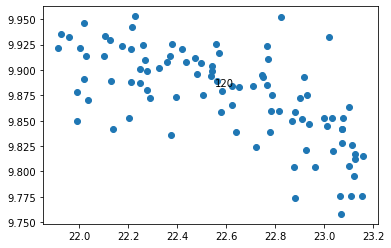

In [51]:
# original method single cluster


arrayx = []
arrayy = []
pavex = []
pavey = []

phx = [] # previous high x values
phy =[] 

initialframe = 120
endframe= 150

initialcluster=3

obnum = 1

totalmap ={}

prevmap = {}

mf = defaultdict(list)
# maximum object/cluster id in any frame
mx = 20

for j in range(0, mx):
    mf[j]=0 

matchfreq= mf


thres= 10

finalarray=[]

finalarray.append(initialcluster)

finalx =[]
finaly =[]

avex =[]
avey =[]

xvalues =[]
yvalues =[]

for i in range(initialframe, endframe+1):
    name = "file_out"
    name = name+str(i)
    name = name+".csv"
    firstrow=0
    # clear matchfreq
    for j in range(0, mx):
        matchfreq[j] =0

    currentmap3 = {} # average coordinates

    print("curr frame is:", i)

    
    with open(name) as csv_file:
        f =0 
        # reset hxvalues , hyvalues
        hxvalues = []
        hyvalues=[]

        obnum=1 

        currentmap= {}

        csv_reader = csv.reader(csv_file, delimiter=",")
        
        if i==initialframe:
            for row in csv_reader:
                # no need for first row skip 
                clusterid = float(row[0])
                if clusterid==initialcluster:
                    xpoint = float(row[1])
                    ypoint = float(row[2])
                    #print("xpt", xpoint)
                    #print("ypt", ypoint)
                    arrayx.append(xpoint)
                    arrayy.append(ypoint)
                    xr = round(xpoint)
                    yr = round(ypoint)
                    fromi = dinvlookupdict[(xr,yr)]
                    h1, i1 = dhighestfreq(fromi)
                    #i1 = newhighestfreq(fromi)
                    prevmap[i1] = 1

            plt.scatter(arrayx, arrayy)
            
            avx = np.mean(arrayx)
            avy = np.mean(arrayy)
            
            finalx.append(avx)
            finaly.append(avy)
            
            # save angle
            
            plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')
            
            #append avx and avy
            avex.append(avx)
            avey.append(avy)

            # reset ky 
            ky = initialcluster
            continue
        for row in csv_reader:
            clusterid = float(row[0])

            if clusterid != obnum:
                numo1 = float(obnum)
                # append into dictionary of maps
                totalmap[numo1] = currentmap
                if matchfreq[numo1] > f:
                    f = matchfreq[numo1]
                    print("f is", f)
                    ky = numo1

                    hxvalues = xvalues
                    hyvalues = yvalues
                obnum= clusterid
                currentmap={}
                # take the average
                avecurrentx = np.mean(xvalues)
                avecurrenty = np.mean(yvalues)
                currentmap3[numo1] = [avecurrentx, avecurrenty]

                xvalues =[]
                yvalues =[]

                continue
            
            xpoint = float(row[1])
            ypoint = float(row[2])
            xr = round(xpoint)
            yr = round(ypoint)
            xvalues.append(xpoint) # save to array 
            yvalues.append(ypoint)
            fromi = dinvlookupdict[(xr,yr)]
            # function to find highest freq 
            h1, i1 = dhighestfreq(fromi)
            # save to map
            currentmap[i1] = 1
            # check prev map
            val = prevmap.get(fromi)
            if val == None:
                pass
            else:
                numo = float(obnum)
                matchfreq[numo] = matchfreq[numo]+1
        numo2 = float(clusterid)
        avecurrentx = np.mean(xvalues) ##USE AS CURRENT X
        avecurrenty = np.mean(yvalues)
        currentmap3[numo2] = [avecurrentx, avecurrenty]
        totalmap[numo2] = currentmap
        xvalues=[] ##RESET
        yvalues=[]
        if matchfreq[numo2] > f:
            ky = numo2
            hxvalues = xvalues
            hyvalues = yvalues
            totalmap[ky]= currentmap
        
        if len(hxvalues) ==0:
            break
            
        if len(hxvalues) !=0:
            finalarray.append(ky)
            prevmap = totalmap[ky]
            
            avx = np.mean(hxvalues)
            avy = np.mean(hyvalues)
            
            
            finalx.append(avx)
            finaly.append(avy)

[3]

i is 120
av coord are 22.594378947368426 9.874587368421054
i is 121
av coord are 29.289787292817675 9.41208314917127
i is 122
av coord are 29.907035885167467 9.358354784688995
i is 123
av coord are 28.11909336609337 10.051342260442262
i is 124
av coord are 30.09939436619718 10.053264319248827


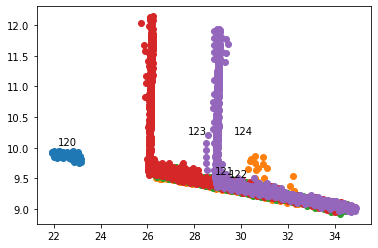

In [62]:

# plot other clusters
array1 = finalarray[0:5]

alen = len(array1)
xv1=[]
yv1=[]

ax =[]
ay =[]

acounter=0
for i in range(initialframe, initialframe+alen):
    name = "file_out"
    name = name+str(i)
    name = name+".csv"
    
    
    a = array1[acounter]
    xarray = []
    yarray = []
    with open(name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=",")
        for row in csv_reader:
            clusterid = float(row[0])
            xpoint = float(row[1])
            ypoint = float(row[2])
            
            if clusterid == a:
                xarray.append(xpoint)
                yarray.append(ypoint)
                #xmissed.append(xpoint)
                #ymissed.append(ypoint)
                
                
        # plot
        #xv1.extend(xarray)
        #yv1.extend(yarray)
        
        
        plt.scatter(xarray,yarray)
        avx = np.mean(xarray)
        avy = np.mean(yarray)
        
        print("i is", i)
        print("av coord are", avx, avy)
        
        plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')
        
        ax.append(avx)
        ay.append(avy)
    
    acounter =acounter +1
    if acounter > alen:
        break

#plt.scatter(xv1, yv1)
#plt.scatter(xv2, yv2)
plt.show()


f is 13
f is 219
f is 221
f is 538
f is 460
f is 197
f is 173
f is 157
f is 154
f is 163
f is 116
f is 135
f is 98
f is 92
f is 29
f is 19
f is 14
f is 29


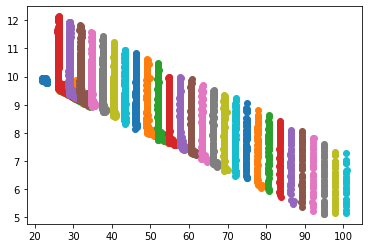

In [57]:



arrayx = []
arrayy = []
pavex = []
pavey = []

phx = [] # previous high x values
phy =[] 

initialframe = 120
endframe= 150

initialcluster=3

obnum = 1

totalmap ={}

prevmap = {}

mf = defaultdict(list)
# maximum object/cluster id in any frame
mx = 20

for j in range(0, mx):
    mf[j]=0 

matchfreq= mf


thres= 10

finalarray=[]

finalarray.append(initialcluster)

finalx =[]
finaly =[]

avex =[]
avey =[]

xvalues =[]
yvalues =[]

for i in range(initialframe, endframe):
    name = "file_out"
    name = name+str(i)
    name = name+".csv"
    firstrow=0
    # clear matchfreq
    for j in range(0, mx):
        matchfreq[j] =0
    with open(name) as csv_file:
        f =0 
        # reset hxvalues , hyvalues
        hxvalues = []
        hyvalues=[]
        
        currentmap= {}
        
        csv_reader = csv.reader(csv_file, delimiter=",")
        
        if i==initialframe:
            for row in csv_reader:
                # no need for first row skip 
                clusterid = float(row[0])
                if clusterid==initialcluster:
                    xpoint = float(row[1])
                    ypoint = float(row[2])
                    #print("xpt", xpoint)
                    #print("ypt", ypoint)
                    arrayx.append(xpoint)
                    arrayy.append(ypoint)
                    xr = round(xpoint)
                    yr = round(ypoint)
                    fromi = dinvlookupdict[(xr,yr)]
                    h1, i1 = dhighestfreq(fromi)
                    prevmap[i1] = 1
            plt.scatter(arrayx, arrayy)
            # reset ky 
            ky = initialcluster
            continue
            
        for row in csv_reader:
            clusterid = float(row[0])
            
            if clusterid != obnum:
                numo1 = float(obnum)
                # append into dictionary of maps
                totalmap[numo1] = currentmap
                if matchfreq[numo1] > f:
                    f = matchfreq[numo1]
                    print("f is", f)
                    ky = numo1
                    
                    hxvalues = xvalues
                    hyvalues = yvalues
                obnum = clusterid
                
                currentindices=[]
                currentmap= {}
                
                xvalues =[]
                yvalues =[]
                # append first values
                #xvalues.append(float(row[1]))
                #yvalues.append(float(row[2]))
                
                continue
            
            xpoint = float(row[1])
            ypoint = float(row[2])
            xr = round(xpoint)
            yr = round(ypoint)
            xvalues.append(xpoint) # save to array 
            yvalues.append(ypoint)
            fromi = dinvlookupdict[(xr,yr)]
            # function to find highest freq 
            h1, i1 = dhighestfreq(fromi)
            # save to map
            currentmap[i1] = 1
            # check prev map
            val = prevmap.get(fromi)
            if val ==None:
                pass
            else:
                numo = float(obnum)
                matchfreq[numo]= matchfreq[numo]+1
        # check f values at end of file
        numo2 = float(obnum)
        if matchfreq[numo2] > f:
            ky = numo2
            hxvalues = xvalues
            hyvalues = yvalues
            totalmap[ky]= currentmap
        finalarray.append(ky)
        # ky is the cluster id with the highest frequency
        listclusterids.append(ky)
        plt.scatter(hxvalues, hyvalues)
        
        if len(hxvalues) ==0:
            print("0 h vals")
        if len(hxvalues) !=0:
            # set prevmap to the one 
            
            prevmap = totalmap[ky]
        # obnum
        
plt.show()

In [59]:
# test the freq grid

import os
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np


# december highest 
# step 4 b 


class frequency_grid(object):
    
    def __init__(self, numpoints=3):
        self.numpoints = numpoints
        self.time_elapsed= 0 # 0
        self.numcells = 160000
        
        self.xmin =-200
        self.xmax = 200
        self.ymin =-200
        self.ymax =200
        
        self.forwardmap = {}  # dcmap1
        self.backmap = {}
        self.countmap = {}
        
        self.current_position = []
        self.prevmap = {} # set to current map at end of frame 
        self.currentmap = {}
        
        self.tracking_list = {} # list of objects that are tracked 
        
        # step 1
        ind_temp = 0
        for ix in range(int(self.xmin), int(self.xmax)):
            for iy in range(int(self.ymin), int(self.ymax)):
                myvec = []
                myvec.append(ix)
                myvec.append(iy)
                self.forwardmap[ind_temp] = myvec
                self.backmap[(ix, iy)]= ind_temp
                ind_temp=ind_temp+1
        
        self.range = 10
        # initialize grid count map
        for i in range(self.numcells):
            p = self.forwardmap[i]
            px = p[0]
            py = p[1]
            for j in range(-self.range, self.range+1):
                jx = px+j
                if jx > self.xmax-1 or jx < self.xmin:
                    continue
                for k in range(-self.range, self.range+1):
                    jy = py +k
                    if jy > self.ymax-1 or jy<self.ymin:
                        continue
                    p2 = self.backmap[(jx, jy)]
                    self.countmap[(i, p2)] = 0 # dtrajcount
    
        
    # set up based on trajectories file : training method 
    def setup_grid(): 
        
        fileind = 1
        for filename in os.listdir('24hrdata'):
            fname = '24hrdata/'+filename
            fileind =fileind+1
            #irow=0
            obnum=1
            with open(fname) as csv_file:
                csv_reader = csv.reader(csv_file, delimiter=',')
                line_count = 0
                for row in csv_reader:
                    trajectory_num = row[0]
                    if line_count==0:
                        line_count = line_count+1 # skip header
                    if line_count==1:
                        prevrow = row
                        prevx = float(prevrow[6])
                        prevy = float(prevrow[7])
                        pfx = round(prevx)
                        pfy = round(prevy)
                        continue
                    currentx = float(row[6])
                    currenty = float(row[7])
                    fx = round(currentx)
                    fy = round(currenty)
                    if pfx == fx and pfy ==fy:
                        #prevframe = frameindex
                        continue
                    if obnum != trajectory_num:
                        pfx = fx
                        pfy = fy
                        obnum = trajectory_num
                        continue
                    #save
                    fromi = self.backmap[(pfx, pfy)]
                    toi = self.backmap[(fx, fy)]
                    if abs(pfx - fx)>10 or abs(pfy - fy)>10:
                        continue
                    mcount = self.countmap[(fromi, toi)]
                    self.countmap[(fromi, toi)] = mcount+1
                    pfx=fx
                    pfy=fy
    
    def highestfreq(fromi):
        highest = 0
        indexhighest = fromi
        (px, py) = self.forwardmap[fromi]
        for j in range(-10, 11):
            jx = px+j
            if jx>xmax-1 or jx<xmin: # check if pts in range
                continue
            for k in range(-10, 11):
                jy = py+k
                # check if pts are in range
                if jy>ymax-1 or jy<ymin:
                    continue
                toi = self.backmap[(jx, jy)]
                t = self.countmap[(fromi, toi)]
                #if t>0:
                    #print(t)
                if t > highest:
                    highest=t
                    indexhighest=toi
        return highest, indexhighest

In [ ]:
fg = frequency_grid()

frame by 10 is 560  with cluster  8
frame by 10 is 570  with cluster  2
frame by 10 is 580  with cluster  1


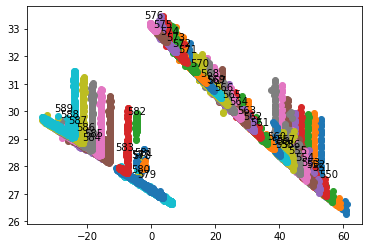

In [104]:
# distance
initialframe = 550
endframe= 590

initialcluster = 5

import matplotlib.pyplot as plt


# array to be plotted
arrayx = []

arrayy = []

xvalues = []
yvalues = []

finalarray=[]

totxvalues = defaultdict(list)
totyvalues = defaultdict(list)
# initialize distances map 
mapdistances = defaultdict(list)

obnum =0

currentdistances = []

mx=15

for j in range(0, mx):
    mapdistances[j]=[]
    totxvalues[j] = []
    totyvalues[j] = []
    


for i in range(initialframe, endframe):
    name = "file_out"
    name = name+str(i)
    name = name+".csv"
    firstrow=0
    # clear map
    for j in range(0, mx):
        mapdistances[j] =[]
        totxvalues[j] =[]
        totyvalues[j]=[]
        
    with open(name) as csv_file:
        m = 1000
        
        f =0 
        # reset hxvalues , hyvalues
        hxvalues = []
        hyvalues=[]

        currentmap= {}

        csv_reader = csv.reader(csv_file, delimiter=",")
        
        if i==initialframe:
            #print("i",i)
            for row in csv_reader:
                
                clusterid = float(row[0])
                
                #print("clusterid", clusterid)
                if clusterid==initialcluster:
                    xpoint = float(row[1])
                    ypoint = float(row[2])
                    arrayx.append(xpoint)
                    arrayy.append(ypoint)
                    
            # find average 
            avx = np.mean(arrayx)
            avy = np.mean(arrayy)
            avprev = [avx, avy ]
            #plt.plot(arrayx, arrayy)
            plt.scatter(arrayx, arrayy)
            plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')
        
            continue
            
        for row in csv_reader:
            clusterid = float(row[0]) # current cluster id 
            
            if clusterid != obnum:
                numo1 = float(obnum)
                mapdistances[numo1] = currentdistances
                totxvalues[numo1] = xvalues
                totyvalues[numo1] = yvalues
                # new comparisons 
                obnum = clusterid
                
                currentdistances=[]
                #currentmap= {}
                
                xvalues =[]
                yvalues =[]
                
                continue
            xpoint = float(row[1])
            ypoint = float(row[2])
            xvalues.append(xpoint) # save to array 
            yvalues.append(ypoint)
            # calc distance
            dx1 = avx - xpoint
            dy1 = avy - ypoint
            d1 = pow(dx1, 2) + pow(dy1, 2)
            dist = pow(d1, 0.5)
            currentdistances.append(dist) 
            
        for j in range(0, mx):
            meandistances = np.mean(mapdistances[j])
            if meandistances < m:
                m = meandistances
                ky = j 
        finalarray.append(ky)
        hxvalues = totxvalues[ky]
        hyvalues = totyvalues[ky]
        
        avx = np.mean(hxvalues)
        avy = np.mean(hyvalues)
        
        #plt.plot(hxvalues, hyvalues)
        plt.scatter(hxvalues, hyvalues)
        
        plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')
        
        # print 10th cluster
        if i % 10 ==0:
            print("frame by 10 is",i, " with cluster ", ky)
        # print mean
        #print("mean x,",np.mean(hxvalues))
        #print("mean y,",np.mean(hyvalues))
        
        # reset hxvalues and hyvalues (don't need )
        hxvalues =[]
        hyvalues =[]
        
plt.show()

In [105]:
577- 550

27

In [98]:
# code to find out the num of clusters in the current frame

i = 550# start frame 
name = "file_out"
name = name+str(i)
name = name+".csv"
firstrow=0

with open(name) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")

    for row in csv_reader:
        clusteridfinal = row[0]

print(clusteridfinal)

10


In [15]:
import math
# make map for every 10 
map10 = {}

# initialize 
#sfs =[390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]
sfs = [10, 20 , 30, 40, 50, 60, 70, 80, 90, 100 ]

for s in sfs:
    map10[s] = []

In [25]:
map10[10] = [6,5]

In [27]:
#map10[20]= [3]
#map10[30]= [3]
#map10[40] = [8]
map10[50] = [6]
map10[60] = [1]
map10[70] = [1]
map10[80] = [4]
map10[90] = [5]
map10[100] = [7]

map10[500] = [2]
map10[510] = [6]

In [49]:
a = np.array(range(1,11))
for el in a:
    print(el)

1
2
3
4
5
6
7
8
9
10


initial cluster is, 1
frame by 10 is 560  with cluster  2


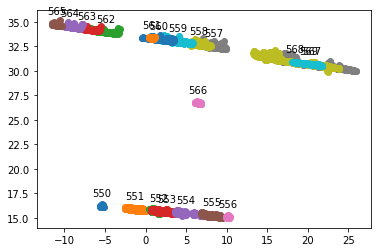

initial cluster is, 2
frame by 10 is 560  with cluster  2


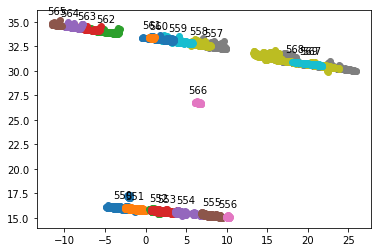

initial cluster is, 3
frame by 10 is 560  with cluster  2


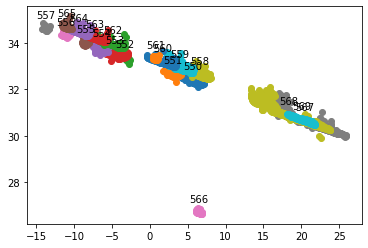

initial cluster is, 4
frame by 10 is 560  with cluster  2


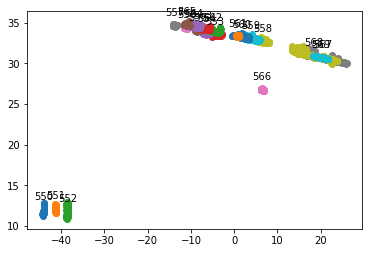

initial cluster is, 5
frame by 10 is 560  with cluster  8


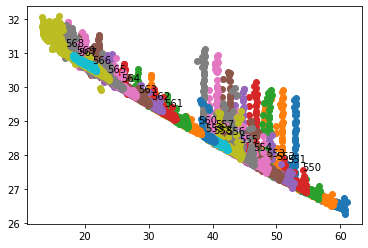

initial cluster is, 6
frame by 10 is 560  with cluster  8


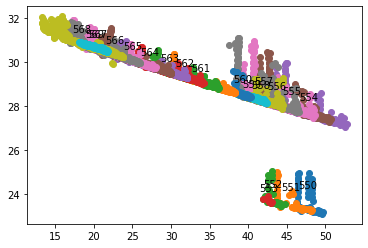

initial cluster is, 7
frame by 10 is 560  with cluster  10


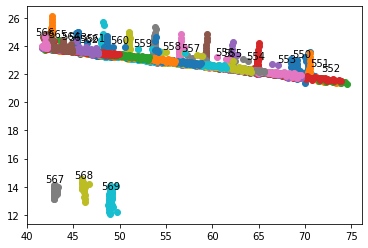

initial cluster is, 8
frame by 10 is 560  with cluster  10


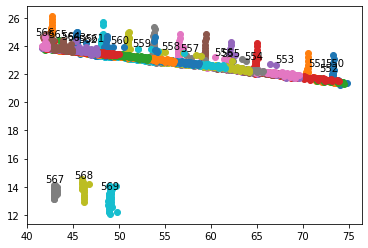

initial cluster is, 9
frame by 10 is 560  with cluster  8


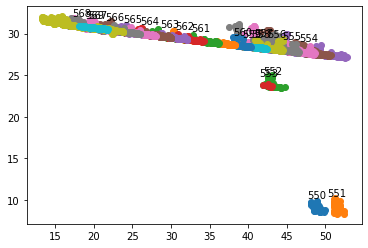

initial cluster is, 10
frame by 10 is 560  with cluster  2


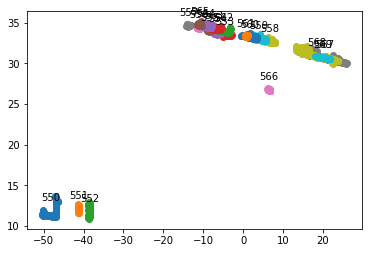

In [101]:
# looped distance version

import matplotlib.pyplot as plt

# distance
initialframe = 550
endframe= 570

imax = 10 # 2, 10
ic = np.array(range(1, imax+1))

unew = []
carray = np.setdiff1d(ic, unew)

for initialcluster in carray:

    print("initial cluster is,", initialcluster)

    # array to be plotted
    arrayx = []

    arrayy = []

    xvalues = []
    yvalues = []

    finalarray=[]

    totxvalues = defaultdict(list)
    totyvalues = defaultdict(list)
    # initialize distances map 
    mapdistances = defaultdict(list)

    obnum =0

    currentdistances = []

    mx=15

    for j in range(0, mx):
        mapdistances[j]=[]
        totxvalues[j] = []
        totyvalues[j] = []



    for i in range(initialframe, endframe):
        name = "file_out"
        name = name+str(i)
        name = name+".csv"
        firstrow=0
        # clear map
        for j in range(0, mx):
            mapdistances[j] =[]
            totxvalues[j] =[]
            totyvalues[j]=[]

        with open(name) as csv_file:
            m = 1000

            f =0 
            # reset hxvalues , hyvalues
            hxvalues = []
            hyvalues=[]

            currentmap= {}

            csv_reader = csv.reader(csv_file, delimiter=",")

            if i==initialframe:
                #print("i",i)
                for row in csv_reader:

                    clusterid = float(row[0])

                    #print("clusterid", clusterid)
                    if clusterid==initialcluster:
                        xpoint = float(row[1])
                        ypoint = float(row[2])
                        arrayx.append(xpoint)
                        arrayy.append(ypoint)

                # find average 
                avx = np.mean(arrayx)
                avy = np.mean(arrayy)
                avprev = [avx, avy ]
                #plt.plot(arrayx, arrayy)
                plt.scatter(arrayx, arrayy)
                plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')

                continue

            for row in csv_reader:
                clusterid = float(row[0]) # current cluster id 

                if clusterid != obnum:
                    numo1 = float(obnum)
                    mapdistances[numo1] = currentdistances
                    totxvalues[numo1] = xvalues
                    totyvalues[numo1] = yvalues
                    # new comparisons 
                    obnum = clusterid

                    currentdistances=[]
                    #currentmap= {}

                    xvalues =[]
                    yvalues =[]

                    continue
                xpoint = float(row[1])
                ypoint = float(row[2])
                xvalues.append(xpoint) # save to array 
                yvalues.append(ypoint)
                # calc distance
                dx1 = avx - xpoint
                dy1 = avy - ypoint
                d1 = pow(dx1, 2) + pow(dy1, 2)
                dist = pow(d1, 0.5)
                currentdistances.append(dist) 

            for j in range(0, mx):
                meandistances = np.mean(mapdistances[j])
                if meandistances < m:
                    m = meandistances
                    ky = j 
            finalarray.append(ky)
            hxvalues = totxvalues[ky]
            hyvalues = totyvalues[ky]

            avx = np.mean(hxvalues)
            avy = np.mean(hyvalues)

            #plt.plot(hxvalues, hyvalues)
            plt.scatter(hxvalues, hyvalues)

            plt.annotate(i, (avx, avy), textcoords="offset points", xytext=(0,10), ha='center')

            # print 10th cluster
            if i % 10 ==0:
                print("frame by 10 is",i, " with cluster ", ky)
            # print mean
            #print("mean x,",np.mean(hxvalues))
            #print("mean y,",np.mean(hyvalues))

            # reset hxvalues and hyvalues (don't need )
            hxvalues =[]
            hyvalues =[]

    plt.show()

In [102]:
567 - 550

17